# Limit theorems

## Law of large numbers

Sample average of an i.i.d. sample $X_1, \ldots, X_n$ with finite mean $\mathbb EX_1 = \mu$ converges to $\mu$ **in probability**:

$$
    \overline X_n \stackrel{P}{\to} \mu, \quad n\to \infty,
$$

i.e., for all $\varepsilon > 0$

$$
\lim\limits_{n\to\infty}\mathbb P(\vert \overline X_n  - \mu \vert > \varepsilon) = 0.
$$

```{admonition} Strong LLN
:class: dropdown
A stronger version of the law of large numbers states that $\overline X_n$ converges to $\mu$ **almost surely**:

$$
    \overline X_n \stackrel{a.s.}{\to} \mu  \iff \mathbb P\big(\lim\limits_{n\to\infty} \overline X_n = \mu\big) = 1.
$$
```

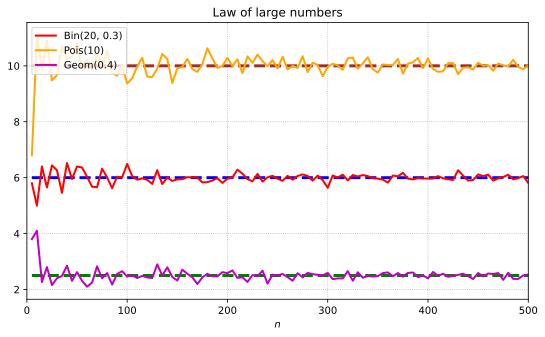

In [37]:
from scipy.stats import binom, poisson, geom, norm
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'

def plot_LLN(rvs, ns, texts):
    plt.figure(figsize=(9, 5))
    colors = (('r', 'b'), ('orange', 'brown'), ('m', 'g'))
    for i, rv in enumerate(rvs):
        sample_means = []
        for n in ns:
            sample_means.append(rv.rvs(size=n).mean())
        plt.plot([ns[0], ns[-1]], [rv.mean(), rv.mean()], c=colors[i][1], lw=3, ls="--")
        plt.plot(ns, sample_means, c=colors[i][0], lw=2, label=texts[i])
    plt.xlim(0, ns[-1])
    plt.xlabel(r"$n$")
    plt.grid(ls=":")
    plt.title("Law of large numbers")
    plt.legend();

rvs = [binom(20, 0.3), poisson(10), geom(0.4)]
texts = ["Bin(20, 0.3)", "Pois(10)", "Geom(0.4)"]
plot_LLN(rvs, np.arange(5, 501, 5), texts)

## Central limit theorem

If i.i.d. samples $X_1, \ldots, X_n$ come from a distribution with finite variance $\mathbb VX_1 = \sigma ^2$, then

$$
    \mathbb E \overline{X}_n = \frac 1n \sum\limits_{k=1}^n \mathbb EX_k = \mu, \quad
    \mathbb V \overline{X}_n = \frac 1{n^2} \sum\limits_{k=1}^n \mathbb VX_k = \frac{\sigma^2}n.
$$

**Central limit theorem** claims that $\overline{X}_n$ looks like $\mathcal N\big(\mu, \frac{\sigma^2}n\big)$ for big values of $n$:

$$
  Z_n := \frac{\sqrt n(\overline X_n - \mu)}{\sigma} \approx \mathcal N(0, 1) \text{ при } n \gg 1. 
$$

More precisely, $Z_n$ converges to $\mathcal N(0,1)$ **in distribution**, i.e.,

$$
    \lim\limits_{n\to\infty}\mathbb P(Z_n \leqslant z) = \Phi(z), \quad \Phi(z) = \frac 1{\sqrt{2\pi}}\int\limits_{-\infty}^z e^{-\frac{t^2}2}dt.
$$

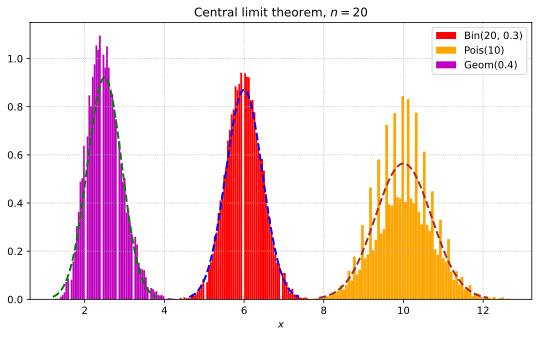

In [91]:
def plot_CLT(rvs, n, texts, N=10**4):
    plt.figure(figsize=(9, 5))
    colors = (('r', 'b'), ('orange', 'brown'), ('m', 'g'))
    for i, rv in enumerate(rvs):
        samples = rv.rvs(size=(N, n)).mean(axis=1)
        plt.hist(samples, bins=80, density=True, color=colors[i][0], label=texts[i])
        xs = np.linspace(rv.mean() - 3*rv.std()/np.sqrt(n), rv.mean() + 3*rv.std()/np.sqrt(n), num=1000)
        plt.plot(xs, norm(loc=rv.mean(), scale=rv.std()/np.sqrt(n)).pdf(xs), c=colors[i][1], lw=2, ls="--")
    plt.xlabel(r"$x$")
    plt.grid(ls=":")
    plt.title(r"Central limit theorem, $n={}$".format(n))
    plt.legend();

rvs = [binom(20, 0.3), poisson(10), geom(0.4)]
texts = ["Bin(20, 0.3)", "Pois(10)", "Geom(0.4)"]
plot_CLT(rvs, 20, texts)

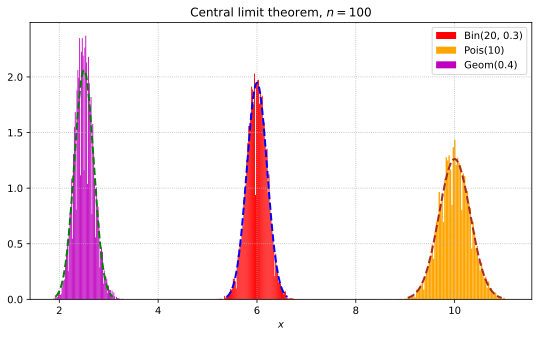

In [92]:
plot_CLT(rvs, 100, texts)

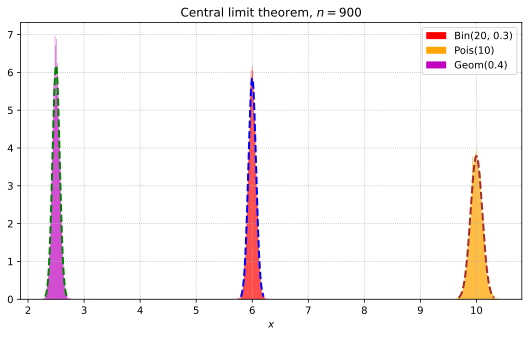

In [75]:
plot_CLT(rvs, 900, texts)

## Exercises

1. Show that $\overline S_n = \overline{X^2}_n - \big(\overline X_n\big)^2$ where $\overline{X^2}_n = \frac 1n\sum\limits_{i=1}^n X_i^2$.